In [2]:
# TOMÁS SEZARO
# TP DE REGRESION utilizando los algoritmos de regresión y técnicas vistos.
# Utilizando los algoritmos de regresión y técnicas vistos, elegí tomar como dataset para este trabajo practico a los Pokémon y realizar mi análisis en función a sus diferentes atributos y características.
# Los Pokémon y los datos que estos tienen son información que tienen un valor y significado muy importante para mí. 
# Representan una parte de mi infancia y adolescencia muy valerosa que me acompaño durante muchísimos años. Tengo un amplio conocimiento sobre esta temática y me entusiasma mucho hacer este análisis ya que jugaba sus videojuegos, veía sus películas y series e intercambiaba sus cartas.
# Por esta razón decidí que mi trabajo sea en base a un dataset de Pokémon. 
# Existen diversas clases de criaturas en el mundo Pokémon, las hay de diferentes tamaños, poderes y colores. Están dotados de fuerzas y habilidades, listos para las batallas y con diferentes atributos de poderes y características.


In [1]:
# Importo las librerias que me brinda Python.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
import seaborn as sns
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
# Realizo la importación de los datos.

df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [4]:
# Realizo la función shape para comprobar los registros y columnas de mi dataset. 

df.shape

(800, 15)

In [5]:
# Utilizo describe para obtener más información acerca de mi dataset.

df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Winbattle,Resistance
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,49.913750,655.573750
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,21.974301,291.629751
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,5.000000,50.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,30.000000,420.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,50.000000,723.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,65.000000,861.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,99.000000,1481.000000


In [6]:
# Decido hacer un analisis de Regresión Lineal Simple entre la relación que tienen la columna Winbattle con Resistance.
# Deseo quedarme únicamente con esas dos columnas, asi que elimino las demás..

In [7]:
df.drop(["#"], axis = 1, inplace = True)
df.drop(["Name"], axis = 1, inplace = True)
df.drop(["Type 1"], axis = 1, inplace = True)
df.drop(["Type 2"], axis = 1, inplace = True)
df.drop(["Total"], axis = 1, inplace = True)
df.drop(["Legendary"], axis = 1, inplace = True)
df.drop(["HP"], axis = 1, inplace = True)
df.drop(["Attack"], axis = 1, inplace = True)
df.drop(["Defense"], axis = 1, inplace = True)
df.drop(["Sp. Atk"], axis = 1, inplace = True)
df.drop(["Sp. Def"], axis = 1, inplace = True)
df.drop(["Speed"], axis = 1, inplace = True)
df.drop(["Generation"], axis = 1, inplace = True)
df.head()

,Winbattle,Resistance
0,35,450
1,50,730
2,75,940
3,86,1110
4,40,500


In [8]:
# Busco si hay algún valor null.

df.isnull().values.any()

False

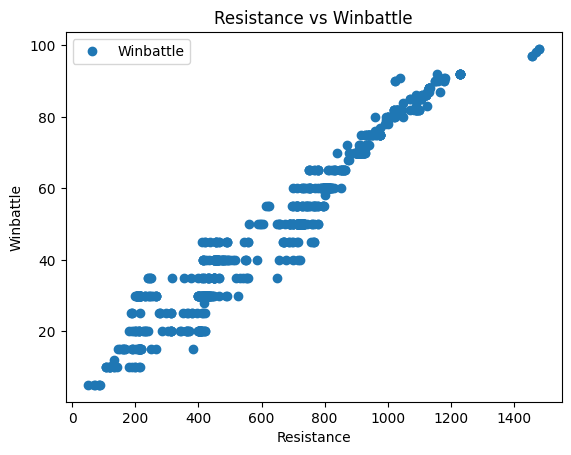

In [9]:
# Gráfico los puntos de datos en un diagrama en dos dimensiones para ilustrar el dataset.
# Verifico si manualmente puedo encontrar alguna relación entre los datos.
# Vemos una proyección ascendente en este caso.

df.plot(x='Resistance', y='Winbattle', style='o') 
plt.title('Resistance vs Winbattle') 
plt.xlabel('Resistance') 
plt.ylabel('Winbattle') 
plt.show()

<Figure size 1500x1000 with 0 Axes>

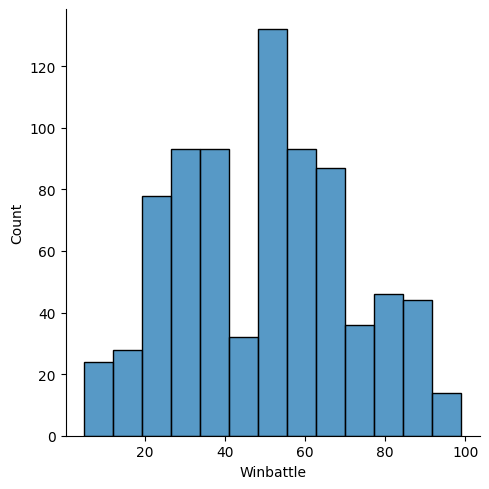

In [10]:
# Busco el valor de Winbattle promedio y lo represento con un gráfico de barras.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(df['Winbattle'])

In [144]:
# La media de Winbattle se encuentra entre los valores de 45 a 55 aprox.

In [11]:
# Dividido los datos en variable independiente y variable dependiente cuyos valores se deben predecir. 

X = df['Resistance'].values.reshape(-1,1)
y = df['Winbattle'].values.reshape(-1,1)
df_aux = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
df_aux

,X,y
0,450,35
1,730,50
2,940,75
3,1110,86
4,500,40
...,...,...
795,1030,82
796,1180,90
797,1095,85
798,1135,88


In [12]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing y conjunto de entrenamiento.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df_aux = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': y_train.flatten()})
df_aux.head()

,X_train,y_train
0,450,35
1,450,35
2,750,65
3,760,50
4,248,35


In [13]:
df_aux = pd.DataFrame({'X_test': X_test.flatten(), 'y_test': y_test.flatten()})
df_aux.head()

,X_test,y_test
0,216,15
1,804,60
2,431,30
3,490,40
4,364,20


In [14]:
# Realizo el entrenamiento del algoritmo

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [15]:
# obtengo el interceptor.

print(regressor.intercept_)

[2.63686166]


In [16]:
# obtengo la pendiente.

print(regressor.coef_)

[[0.07241806]]


In [17]:
# El resultado debe ser aproximadamente 2.63686166 y 0.07241806 respectivamente. 
# Esto significa que por cada unidad de cambio en la Resistencia, 
# el cambio en el Winbattle es de al rededor de 0.072%.

In [18]:
# Utilizo el método predict() para tomar este conjunto de características y devolver las predicciones correspondientes para la variable dependiente.

y_pred = regressor.predict(X_test)

In [19]:
# Percibo que el valor que obtengo en la columna Predicted se acerca bastante al Actual.

df_aux = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_aux

,Actual,Predicted
0,15,18.279163
1,60,60.860985
2,30,33.849047
3,40,38.121713
4,20,28.997037
...,...,...
155,20,28.997037
156,30,19.293016
157,55,58.036680
158,60,64.264634


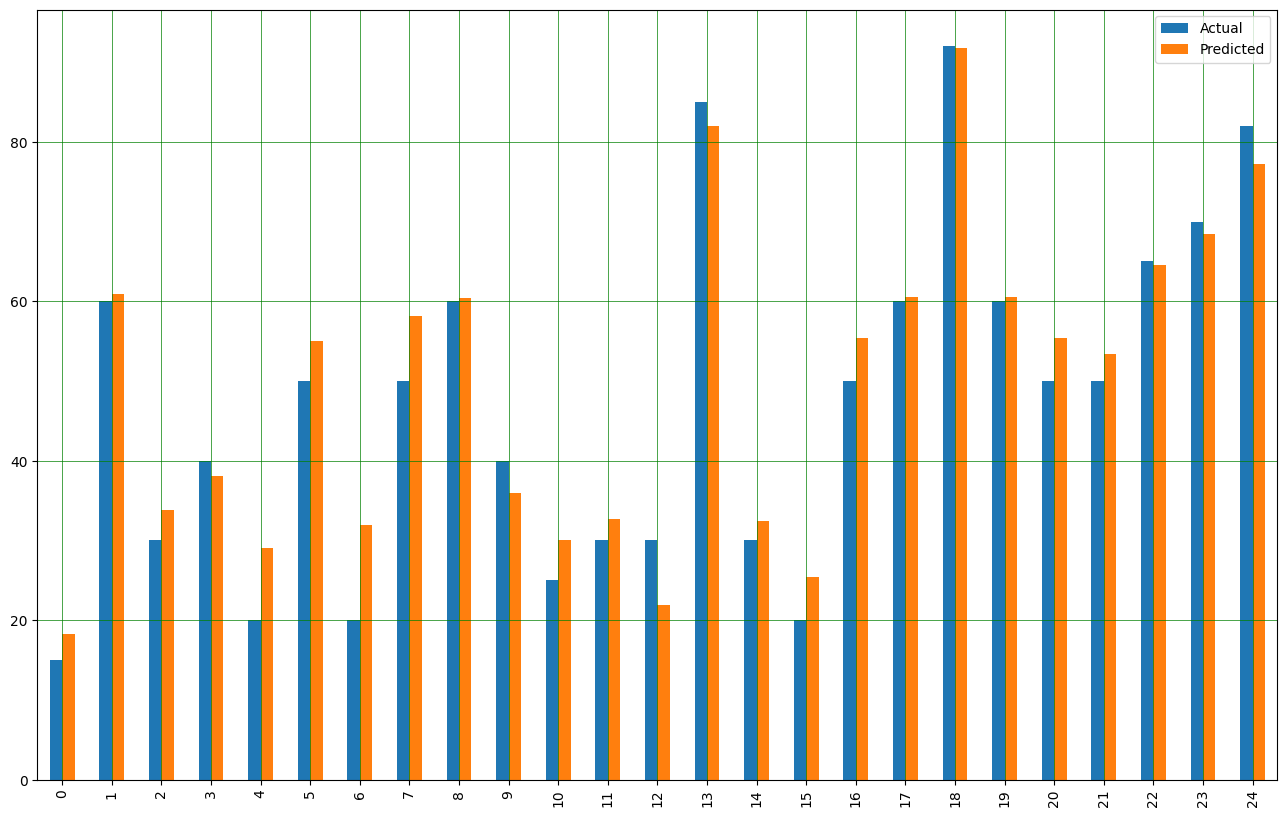

In [20]:
# Realizo un gráfico de barras mostrando la comparación de valores reales y predichos.
# Tomo unos 25 registros.


df1 = df_aux.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

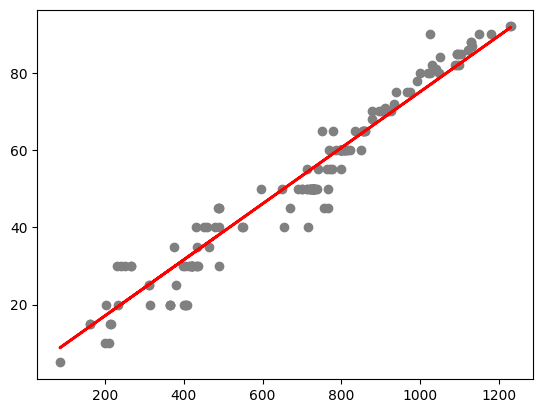

In [21]:
# Los porcentajes predichos se acercan a los reales. 
# Trazo una línea recta con los datos de la prueba.

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [156]:
# Finalmente analizaré el Error Absoluto Medio, el Error Cuadratico Medio y la Raíz del error cuadrático medio.
# El Error Absoluto Medio mide la magnitud promedio de los errores en las predicciones del modelo. Se calcula tomando la diferencia absoluta entre cada valor predicho y el valor real, y luego promediando esos errores.
# El Error Cuadrático Medio calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Al elevar los errores al cuadrado, este métrica da más peso a los errores más grandes.
# La Raíz del Error Cuadrático Medio es simplemente la raíz cuadrada del MSE. Proporciona una medida del error promedio, similar al MAE, pero está en la misma escala que los valores originales.

In [22]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 3.848300608049468
Error Cuadratico Medio: 24.84009195088455
Raíz del error cuadrático medio: 4.9839835423970404


In [158]:
# Teniendo en cuenta estos valores, puedo sacar algunas conclusiones:

# El Error Absoluto Medio de aproximadamente 3.85 indica que, en promedio, las predicciones difieren del valor real en aproximadamente 3.85 unidades en la escala de WinBattle.
# El Error Cuadrático Medio de aproximadamente 24.84 muestra que los errores entre las predicciones y los valores reales pueden ser mayores en magnitud debido al efecto del cuadrado.
# La Raíz del Error Cuadrático Medio de aproximadamente 4.98 indica que, en promedio, las predicciones difieren del valor real en aproximadamente 4.98 unidades en la escala de WinBattle.

# Por lo tanto, los resultados indican que el modelo tiene un error promedio MODERADO en las predicciones de WinBattle con respecto a Resistance.
# El error Cuadratico se encuentra además entre los valores acordes con relación al 10% del valor de la media de WinBattle que se encuentra entre los 45 y 55
# Igualmente en lineas generales y a la vista de los graficos, la conclusión en general es que a mayor valor de Resistance del pokemon, es altamente probable que haya un mayor número de WinBattle. 

In [159]:
# Me gustaria realizar otro analisis pero está vez aplicando Regresión Lineal Multiple.

In [23]:
# Realizo la importación de los datos.

df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [25]:
# Realizo la función shape para comprobar los registros y columnas de mi dataset.

df.shape

(800, 15)

In [26]:
# Para este análisis la columna de Name no será necesaria, por lo que decido eliminarla.

df.drop(["Name"], axis = 1, inplace = True)

In [27]:
# Compruebo que se eliminó la columna Name.

df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [28]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [29]:
# En este caso el resultado devolvió true, por lo que hay valores null.
# Consulto cuantos valores null hay. 

df.isnull().sum().sum()

386

In [30]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [31]:
# Comprobé que únicamente tuve valores null en la columna Type 2, por lo que decido eliminarla para simplificar de manera resolutiva.

df.drop(["Type 2"], axis = 1, inplace = True)
df.head()

,#,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Grass,318,45,49,49,65,65,45,1,False,35,450
1,2,Grass,405,60,62,63,80,80,60,1,False,50,730
2,3,Grass,525,80,82,83,100,100,80,1,False,75,940
3,3,Grass,625,80,100,123,122,120,80,1,False,86,1110
4,4,Fire,309,39,52,43,60,50,65,1,False,40,500


In [34]:
# Constato que ahora no se encuentran valores null en el dataset.

df.isnull().values.any()

False

<Figure size 1500x1000 with 0 Axes>

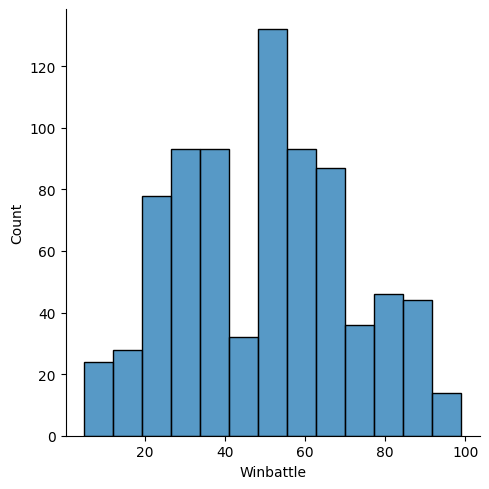

In [35]:
# Quiero encontrar el valor promedio de Winbattle.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(df['Winbattle'])

In [ ]:
# La media de Winbattle se encuentra entre los valores de 45 a 55 aprox.

In [36]:
# Ahora es cuando decido separar el dataset entre variables dependientes e independientes.
# X tendrá las variables independientes.

X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]].values
X


array([[1, 'Grass', 318, ..., 1, False, 450],
       [2, 'Grass', 405, ..., 1, False, 730],
       [3, 'Grass', 525, ..., 1, False, 940],
       ...,
       [720, 'Psychic', 600, ..., 6, True, 1095],
       [720, 'Psychic', 680, ..., 6, True, 1135],
       [721, 'Fire', 600, ..., 6, True, 1030]], dtype=object)

In [37]:
# Mientras que Y almacenará la variable dependiente.

y = df.iloc[:, 11].values
y


array([35, 50, 75, 86, 40, 60, 80, 90, 90, 35, 50, 75, 86,  5, 25, 45,  5,
       25, 45, 65, 10, 30, 50, 65, 12, 30, 15, 30, 20, 45, 40, 65, 40, 60,
       20, 45, 65, 20, 45, 65, 40, 65, 25, 60, 20, 50, 10, 40, 10, 30, 60,
       15, 35, 15, 35, 20, 50, 10, 45, 15, 55, 15, 45, 20, 65, 20, 45, 60,
       30, 50, 70, 85, 20, 40, 65, 10, 35, 50, 20, 50, 30, 50, 70, 20, 50,
       20, 60, 80, 30, 60, 45, 15, 35, 30, 60, 15, 55, 30, 60, 30, 55, 75,
       85, 50, 35, 60, 15, 50, 30, 55, 20, 65, 30, 50, 50, 50, 55, 15, 50,
       40, 60, 55, 50, 55, 78, 25, 50, 20, 50, 20, 50, 60, 50, 60, 60, 60,
       45, 65, 55,  5, 70, 87, 70, 45, 30, 65, 65, 65, 40, 40, 70, 40, 70,
       75, 83, 72, 82, 82, 82, 40, 65, 88, 92, 99, 99, 91, 35, 55, 75, 40,
       60, 80, 35, 55, 75, 15, 55, 20, 55, 15, 35, 10, 30, 60, 30, 55, 25,
       30, 10, 25, 55, 30, 60, 20, 50, 70, 80, 55, 25, 55, 50, 60, 20, 30,
       50, 15, 10, 50, 40, 20, 50, 65, 65, 60, 55, 60, 40, 60, 40, 10, 30,
       35, 60, 72, 82, 30

In [38]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Type1.

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X


array([[1, 9, 318, ..., 1, False, 450],
       [2, 9, 405, ..., 1, False, 730],
       [3, 9, 525, ..., 1, False, 940],
       ...,
       [720, 14, 600, ..., 6, True, 1095],
       [720, 14, 680, ..., 6, True, 1135],
       [721, 6, 600, ..., 6, True, 1030]], dtype=object)

In [39]:
# Emito ambos grupos de datos para comparar y ver como quedaron convertidos los datos categóricos.

pd.concat([pd.DataFrame(X[:, 1]),df.iloc[:, 1]], axis=1)

,0,Type 1
0,9,Grass
1,9,Grass
2,9,Grass
3,9,Grass
4,6,Fire
...,...,...
795,15,Rock
796,15,Rock
797,14,Psychic
798,14,Psychic


In [40]:
# Mismo proceso con la columna Legendary, utilizo LabelEnconder para convertir a números los datos categóricos.

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 10] = labelencoder_X.fit_transform(X[:, 10])
X

array([[1, 9, 318, ..., 1, 0, 450],
       [2, 9, 405, ..., 1, 0, 730],
       [3, 9, 525, ..., 1, 0, 940],
       ...,
       [720, 14, 600, ..., 6, 1, 1095],
       [720, 14, 680, ..., 6, 1, 1135],
       [721, 6, 600, ..., 6, 1, 1030]], dtype=object)

In [41]:
# Emito ambos grupos de datos para comparar y ver como quedaron convertidos los datos categóricos.

pd.concat([pd.DataFrame(X[:, 9]),df.iloc[:, 10]], axis=1)

,0,Legendary
0,1,False
1,1,False
2,1,False
3,1,False
4,1,False
...,...,...
795,6,True
796,6,True
797,6,True
798,6,True


In [42]:
# Utilizo OneHotEncoder para codificar características categóricas como una matriz numérica.
# make_column_transformer permite aplicar transformaciones de datos de forma selectiva a diferentes columnas del conjunto de datos. 
# Esto calcula los datos categóricos y sobrescribe.


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
onehotencoder = make_column_transformer((OneHotEncoder(), [1]), remainder = "passthrough")
X = onehotencoder.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., 1, 0, 450],
       [0.0, 0.0, 0.0, ..., 1, 0, 730],
       [0.0, 0.0, 0.0, ..., 1, 0, 940],
       ...,
       [0.0, 0.0, 0.0, ..., 6, 1, 1095],
       [0.0, 0.0, 0.0, ..., 6, 1, 1135],
       [0.0, 0.0, 0.0, ..., 6, 1, 1030]], dtype=object)

In [43]:
# Chequeo el resultado observando una porción.

pd.concat([pd.DataFrame(X),df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]]], axis=1).head()

,0,1,2,3,4,5,6,7,8,9,...,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Resistance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,318,45,49,49,65,65,45,1,False,450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,405,60,62,63,80,80,60,1,False,730
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,525,80,82,83,100,100,80,1,False,940
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,625,80,100,123,122,120,80,1,False,1110
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,309,39,52,43,60,50,65,1,False,500


In [44]:
# Para evitar las trampas de las variables ficticias elimino una de las columnas. 
# Elimino la columna 1 de las variables dummy.
# Chequeo el resultado observando una porción.


X = X[:,1:] 
pd.concat([pd.DataFrame(X),df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]]], axis=1).head()

,0,1,2,3,4,5,6,7,8,9,...,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Resistance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,318,45,49,49,65,65,45,1,False,450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,405,60,62,63,80,80,60,1,False,730
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,525,80,82,83,100,100,80,1,False,940
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,625,80,100,123,122,120,80,1,False,1110
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,309,39,52,43,60,50,65,1,False,500


In [45]:
# Utilizo fit transform y muestro la matriz Y. 

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([ 8, 11, 20, 31,  9, 14, 25, 34, 34,  8, 11, 20, 31,  0,  5, 10,  0,
        5, 10, 15,  1,  7, 11, 15,  2,  7,  3,  7,  4, 10,  9, 15,  9, 14,
        4, 10, 15,  4, 10, 15,  9, 15,  5, 14,  4, 11,  1,  9,  1,  7, 14,
        3,  8,  3,  8,  4, 11,  1, 10,  3, 12,  3, 10,  4, 15,  4, 10, 14,
        7, 11, 17, 30,  4,  9, 15,  1,  8, 11,  4, 11,  7, 11, 17,  4, 11,
        4, 14, 25,  7, 14, 10,  3,  8,  7, 14,  3, 12,  7, 14,  7, 12, 20,
       30, 11,  8, 14,  3, 11,  7, 12,  4, 15,  7, 11, 11, 11, 12,  3, 11,
        9, 14, 12, 11, 12, 23,  5, 11,  4, 11,  4, 11, 14, 11, 14, 14, 14,
       10, 15, 12,  0, 17, 32, 17, 10,  7, 15, 15, 15,  9,  9, 17,  9, 17,
       20, 28, 19, 27, 27, 27,  9, 15, 33, 36, 39, 39, 35,  8, 12, 20,  9,
       14, 25,  8, 12, 20,  3, 12,  4, 12,  3,  8,  1,  7, 14,  7, 12,  5,
        7,  1,  5, 12,  7, 14,  4, 11, 17, 25, 12,  5, 12, 11, 14,  4,  7,
       11,  3,  1, 11,  9,  4, 11, 15, 15, 14, 12, 14,  9, 14,  9,  1,  7,
        8, 14, 19, 27,  7

In [46]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
# Chequeo las dimensiones. 

len(X_train), len(X_test), len(y_train), len(y_test)

(640, 160, 640, 160)

In [48]:
# Imprimo en pantalla X_train que me devolverá una matriz.

X_train

array([[0.0, 0.0, 0.0, ..., 2, 0, 450],
       [0.0, 0.0, 0.0, ..., 1, 0, 450],
       [0.0, 0.0, 0.0, ..., 1, 0, 750],
       ...,
       [0.0, 0.0, 0.0, ..., 5, 0, 366],
       [0.0, 0.0, 0.0, ..., 5, 0, 910],
       [0.0, 0.0, 0.0, ..., 5, 0, 824]], dtype=object)

In [49]:
# Imprimo en pantalla X_test que me devolverá una matriz.

X_test


array([[0.0, 0.0, 0.0, ..., 3, 0, 216],
       [0.0, 0.0, 0.0, ..., 4, 0, 804],
       [0.0, 0.0, 0.0, ..., 3, 0, 431],
       ...,
       [0.0, 0.0, 0.0, ..., 3, 0, 765],
       [0.0, 0.0, 0.0, ..., 2, 0, 851],
       [0.0, 0.0, 0.0, ..., 2, 0, 478]], dtype=object)

In [50]:
# Imprimo en pantalla y_train que me devolverá una matriz.

y_train

array([ 8,  8, 15, 11,  8, 12, 14, 10, 20, 14,  4, 10, 30, 10, 11, 31, 27,
        4,  1,  7,  7,  1,  7,  7,  4, 37,  8, 19, 17, 10,  8,  3, 27, 11,
       14, 11, 30,  7,  5,  5, 28,  7, 17, 30, 11, 11, 11, 33, 14, 14,  7,
        8, 36, 11,  7,  7, 10,  4,  4, 14, 11, 17,  5,  7, 11,  4, 17,  7,
       36,  7, 12, 11,  9,  7, 14, 27, 10, 11,  9,  5, 11, 34, 17, 10, 12,
       10, 31, 20,  7,  4,  8,  8,  1,  9, 15,  9, 11, 14, 15, 12, 35,  7,
        1, 25, 37,  4, 11, 19, 30,  7, 17,  7, 10,  1, 14, 34, 33, 11,  4,
       12, 11, 30, 11,  7,  6, 27, 12, 11,  7,  4,  7, 31, 10, 16,  7, 25,
       17, 11,  8,  4, 12, 14, 10,  9,  5,  9,  9,  9,  4,  3, 20, 12, 26,
       12, 11, 17, 11, 14, 12, 12, 25, 10, 17,  7,  1,  7, 12, 14, 15,  7,
       14,  5,  3,  8,  1, 25,  9, 20, 11, 14, 14, 19, 10, 17, 11, 30, 17,
        7, 14, 17,  7,  7,  9,  9,  7,  5,  4, 11, 20,  7, 27,  3, 14, 17,
        7, 14, 31, 14,  9, 11, 25,  5,  3, 14, 17, 17,  8,  9, 12,  7,  7,
        8, 14, 14, 17, 36

In [51]:
# Imprimo en pantalla y_test que me devolverá una matriz.

y_test

array([ 3, 14,  7,  9,  4, 11,  4, 11, 14,  9,  5,  7,  7, 30,  7,  4, 11,
       14, 36, 14, 11, 11, 15, 17, 27,  7, 27, 17, 17, 17, 15, 10,  4, 14,
       25, 15, 20, 10,  9,  7,  4, 34, 14, 15,  7,  7, 14,  7, 11,  9, 23,
        5,  9,  1,  7, 11, 31, 14,  7, 14, 29, 34, 11,  4, 15,  0,  7, 17,
       15, 16,  7, 17, 11, 12,  7, 11, 14, 11,  8, 30, 14,  7,  9, 17, 11,
       14, 11, 11,  4, 11, 19, 11, 30, 20, 14, 32, 11, 17, 14, 18, 11, 25,
       11, 11, 10, 14, 12, 14, 25,  4, 34, 14, 15,  9, 14, 17, 11, 15, 11,
       11, 12,  3, 11, 27,  7, 17, 11, 10, 11, 26,  5,  3, 20, 33, 33, 17,
       25, 12, 14, 10,  3, 10,  8, 11, 27, 36, 17, 30,  7,  9, 11, 12,  4,
        8,  1,  4,  7, 12, 14,  9], dtype=int64)

In [52]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [240]:
# Imprimo X_train y constato.

X_train


array([[-0.20161946, -0.19738551, -0.24413654, ..., -0.7839194 ,
        -0.29111125, -0.6552238 ],
       [-0.20161946, -0.19738551, -0.24413654, ..., -1.38838737,
        -0.29111125, -0.6552238 ],
       [-0.20161946, -0.19738551, -0.24413654, ..., -1.38838737,
        -0.29111125,  0.3579436 ],
       ...,
       [-0.20161946, -0.19738551, -0.24413654, ...,  1.02948451,
        -0.29111125, -0.93891068],
       [-0.20161946, -0.19738551, -0.24413654, ...,  1.02948451,
        -0.29111125,  0.89829955],
       [-0.20161946, -0.19738551, -0.24413654, ...,  1.02948451,
        -0.29111125,  0.60785823]])

In [241]:
#Imprimo X_test y constato.

X_test

array([[-0.20161946, -0.19738551, -0.24413654, ..., -0.17945143,
        -0.29111125, -1.44549438],
       [-0.20161946, -0.19738551, -0.24413654, ...,  0.42501654,
        -0.29111125,  0.54031373],
       [-0.20161946, -0.19738551, -0.24413654, ..., -0.17945143,
        -0.29111125, -0.71939107],
       ...,
       [-0.20161946, -0.19738551, -0.24413654, ..., -0.17945143,
        -0.29111125,  0.40860197],
       [-0.20161946, -0.19738551, -0.24413654, ..., -0.7839194 ,
        -0.29111125,  0.69904329],
       [-0.20161946, -0.19738551, -0.24413654, ..., -0.7839194 ,
        -0.29111125, -0.56066151]])

In [53]:
# Ajusto el modelo de RLM con el conjunto de entrenamiento.

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Realizo la predicción de los resultados en el conjunto de testing y muestro los datos que quedaron en y_pred

y_pred = regression.predict(X_test)
y_pred

array([ 2.57669037, 16.44455308,  6.2165486 ,  8.78210228,  6.59930921,
       12.83454755,  5.26409866, 15.04953637, 15.45062507, 10.08141936,
        4.88237945,  6.67972161,  4.41413013, 29.97567563,  9.11327772,
        3.90528759, 12.67821078, 14.49110541, 33.92869301, 16.39860874,
       13.21703582, 13.10598674, 18.01854743, 17.23399692, 22.76620145,
        6.0441095 , 27.82028193, 17.42821948, 17.92906216, 17.42315666,
       17.57753532, 14.46964248,  5.52974211, 15.16689211, 21.78118177,
       13.92421187, 19.37629474, 15.20550187,  6.98557668, -6.08961174,
        5.04116875, 31.9306887 ,  8.17054649, 17.9765059 ,  5.06541122,
        6.44438195, 16.42446788,  7.70489124, 11.79017827,  6.89518994,
       20.38713978,  4.0361082 ,  8.00381385,  2.81357234,  2.86184579,
       16.12538741, 22.74109809, 15.04876   ,  4.42657498, 16.05603782,
       21.98424031, 24.63671595, 12.2940396 ,  3.80761208, 16.53221771,
        3.68167203,  5.19149225, 17.35450942, 16.80637174, 17.59

In [56]:
# Comparo los valores de las columnas Real del y_test con la predicción de y_pred
# Observo que en general son valores relativamente cercanos.

df = pd.DataFrame({'Real': y_test.flatten(), 'Predicción': y_pred.flatten()})
df1.head()

,Actual,Predicted
0,15,18.279163
1,60,60.860985
2,30,33.849047
3,40,38.121713
4,20,28.997037


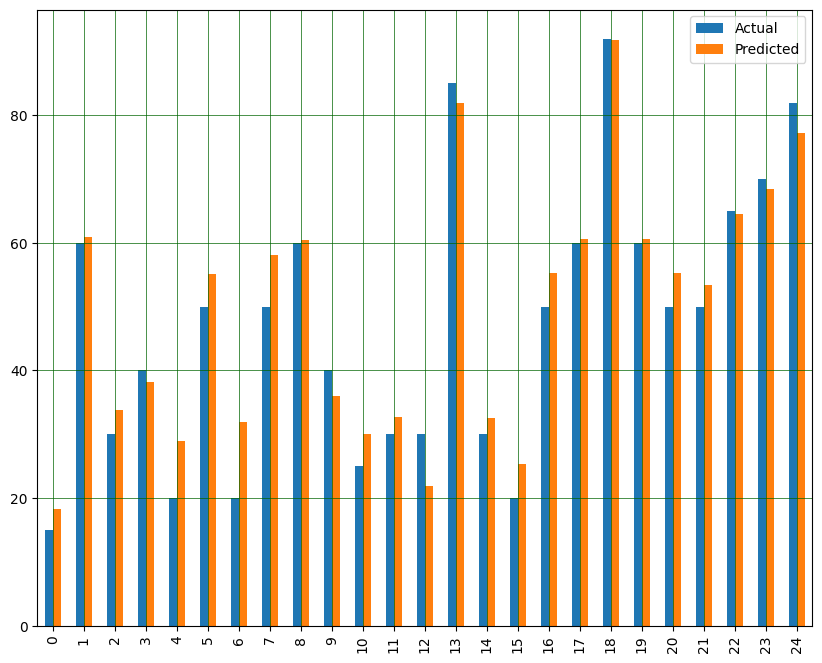

In [57]:
# Realizo un gráfico de barras mostrando las diferencias entre los valores reales y los de la predicción.

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='darkgreen')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

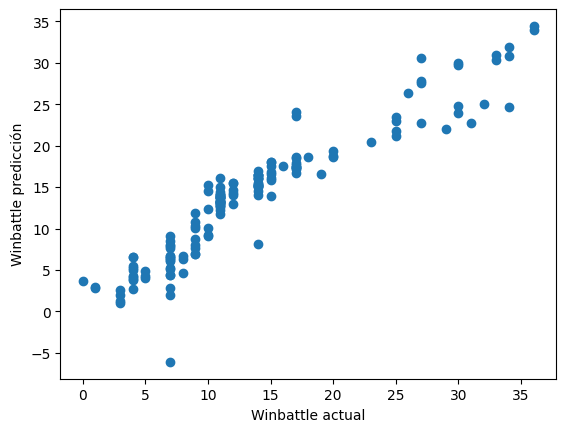

In [246]:
# Muestro la comparación en un grafico.

plt.scatter(y_test, y_pred)
plt.xlabel("Winbattle actual")
plt.ylabel("Winbattle predicción")
plt.show()

In [247]:
# Finalmente analizaré el Error Absoluto Medio, el Error Cuadratico Medio y la Raíz del error cuadrático medio.

# El Error Absoluto Medio mide la magnitud promedio de los errores en las predicciones del modelo. Se calcula tomando la diferencia absoluta entre cada valor predicho y el valor real, y luego promediando esos errores.
# El Error Cuadrático Medio calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Al elevar los errores al cuadrado, este métrica da más peso a los errores más grandes.
# La Raíz del Error Cuadrático Medio es simplemente la raíz cuadrada del MSE. Proporciona una medida del error promedio, similar al MAE, pero está en la misma escala que los valores originales.

In [58]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 2.158770970318563
Error Cuadratico Medio: 8.06719521699956
Raíz del error cuadrático medio: 2.8402808341781203


In [249]:
# Teniendo en cuenta estos valores, puedo sacar algunas conclusiones:

# El Error Absoluto Medio de aproximadamente 2.15 indica que, en promedio, las predicciones difieren del valor real en aproximadamente 3.85 unidades en la escala de WinBattle.
# El Error Cuadrático Medio de aproximadamente 8.06 muestra que los errores entre las predicciones y los valores reales pueden ser mayores en magnitud debido al efecto del cuadrado.
# La Raíz del Error Cuadrático Medio de aproximadamente 2.84 indica que, en promedio, las predicciones difieren del valor real en aproximadamente 2.84 unidades en la escala de WinBattle.

# Por lo tanto, los resultados indican que el modelo tiene un error promedio MODERADAMENTE BAJO en las predicciones de WinBattle con respecto a Resistance.
# Bajaron considerablmente los errores absoluto medio, cuadratico medio y la raiz del error cuadratico medio en la regresión multiple comparado a la regresión lineal simple.
# El error Cuadratico se encuentra además debajo de los valores acordes con relación al 10% del valor de la media de WinBattle que se encuentra entre los 45 y 55. 

In [250]:
# Puedo intentar hacer una variante a esto con la eliminación hacia atras para eliminar algunas variables que no influyen tanto con la variable dependiente

In [59]:
# Chequeo del dataset la porción X

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,318,45,49,49,65,65,45,1,0,450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,405,60,62,63,80,80,60,1,0,730
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,525,80,82,83,100,100,80,1,0,940
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,625,80,100,123,122,120,80,1,0,1110
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,309,39,52,43,60,50,65,1,0,500


In [60]:
# Importo statsmodels, que es un módulo que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, para realizar pruebas estadísticas y exploración de datos estadísticos.
# Construyo el modelo óptimo de RLM utilizando la Eliminación hacia atrás
# Agrego la columna de 1 al conjunto X original
# Tupla de 800 filas por 1 columna de tipo entero


import statsmodels.api as sm

X = np.append(arr = np.ones((800,1)).astype(int), values = X, axis = 1) 
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,318,45,49,49,65,65,45,1,0,450
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,405,60,62,63,80,80,60,1,0,730
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,525,80,82,83,100,100,80,1,0,940
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,625,80,100,123,122,120,80,1,0,1110
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,309,39,52,43,60,50,65,1,0,500


In [62]:
# X_opt, al inicio, tomará todas las filas y cada una de las columnas del conjunto de datos. 

X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
pd.DataFrame(X_opt).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,318,45,49,49,65,65,45,1,0,450
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,405,60,62,63,80,80,60,1,0,730
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,525,80,82,83,100,100,80,1,0,940
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,625,80,100,123,122,120,80,1,0,1110
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,309,39,52,43,60,50,65,1,0,500


In [63]:
# Aplico la técnica OLS 
# Es una técnica de regresión lineal utilizada para estimar los parámetros de un modelo de regresión. 
# Consiste en encontrar la línea o superficie que mejor se ajusta a los datos observados minimizando la suma de los residuos al cuadrado.
# Observar el p valor en el sumario

SL = 0.05
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     285.2
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        23:27:02   Log-Likelihood:                -1853.2
No. Observations:                 800   AIC:                             3762.
Df Residuals:                     772   BIC:                             3894.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4978      0.598     -9.194      0.000      -6.672      -4.324
x1            -0.1307      0.562     -0.233      0.816      -1.233       0.972
x2             2.2249      0.584      3.807      0.000       1.078       3.372
x3            -1.3286      0.505     -2.633      0.009      -2.319      -0.338
x4             0.4112      0.698      0.589      0.556      -0.959       1.782
x5             0.1809      0.579      0.312      0.755      -0.955       1.317
x6            -0.6444      0.482     -1.337      0.182      -1.591       0.302
x7            -3.4074      1.316     -2.588      0.010      -5.992      -0.823
x8             0.1192      0.558      0.214      0.831      -0.977       1.215
x9            -1.3821      0.442     -3.130      0.002      -2.249      -0.515
x10           -0.2451      0.561     -0.437      0.662      -1.346       0.856
x11           -0.1462      0.621     -0.235      0.814      -1.365       1.073
x12            0.0294      0.406      0.072      0.942      -0.768       0.827
x13           -0.6010      0.564     -1.066      0.287      -1.708       0.505
x14            1.1822      0.490      2.412      0.016       0.220       2.144
x15           -0.4580      0.512     -0.894      0.372      -1.464       0.548
x16            0.5920      0.613      0.966      0.335      -0.612       1.796
x17           -1.2691      0.400     -3.173      0.002      -2.054      -0.484
x18           -0.0060      0.003     -2.153      0.032      -0.012      -0.001
x19            0.0148      0.002      9.704      0.000       0.012       0.018
x20           -0.0043      0.004     -1.052      0.293      -0.012       0.004
x21            0.0025      0.004      0.622      0.534      -0.005       0.010
x22            0.0067      0.004      1.689      0.092      -0.001       0.014
x23            0.0190      0.004      4.651      0.000       0.011       0.027
x24           -0.0078      0.004     -1.755      0.080      -0.017       0.001
x25           -0.0012      0.004     -0.340      0.734      -0.008       0.006
x26            0.6206      0.345      1.799      0.072      -0.057       1.298
x27            5.7873      0.402     14.390      0.000       4.998       6.577
x28            0.0163      0.001     22.663      0.000       0.015       0.018
==============================================================================
Omnibus:                      104.622   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.950
Skew:                           0.771   Prob(JB):                     1.56e-46
Kurtosis:                       4.988   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [255]:
# Si este p valor supera el nivel de significación (SL), entonces se sigue con el siguiente paso y se procede a eliminar esa variable. 
# Si todas las variables tienen un p valor inferior 0.05 (SL) entonces se da por finalizado el modelo.

In [256]:
# En este caso hay varias variables que superan dicho valor, elimino la mas grande que es la 12

In [64]:
# Saco columna 12 y vuelvo a aplicar la técnica OLS.

X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     296.5
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        23:32:02   Log-Likelihood:                -1853.2
No. Observations:                 800   AIC:                             3760.
Df Residuals:                     773   BIC:                             3887.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4813      0.552     -9.930      0.000      -6.565      -4.398
x1            -0.1477      0.510     -0.290      0.772      -1.148       0.852
x2             2.2075      0.532      4.146      0.000       1.162       3.253
x3            -1.3452      0.449     -2.996      0.003      -2.227      -0.464
x4             0.3944      0.658      0.600      0.549      -0.897       1.686
x5             0.1637      0.528      0.310      0.756      -0.872       1.200
x6            -0.6614      0.421     -1.569      0.117      -1.489       0.166
x7            -3.4250      1.293     -2.649      0.008      -5.963      -0.887
x8             0.1029      0.510      0.202      0.840      -0.899       1.105
x9            -1.3988      0.377     -3.714      0.000      -2.138      -0.659
x10           -0.2624      0.507     -0.517      0.605      -1.258       0.733
x11           -0.1635      0.572     -0.286      0.775      -1.287       0.960
x12           -0.6178      0.514     -1.202      0.230      -1.626       0.391
x13            1.1649      0.428      2.722      0.007       0.325       2.005
x14           -0.4739      0.463     -1.024      0.306      -1.382       0.434
x15            0.5769      0.576      1.001      0.317      -0.554       1.708
x16           -1.2863      0.322     -3.999      0.000      -1.918      -0.655
x17           -0.0060      0.003     -2.154      0.032      -0.012      -0.001
x18            0.0148      0.002      9.710      0.000       0.012       0.018
x19           -0.0042      0.004     -1.061      0.289      -0.012       0.004
x20            0.0025      0.004      0.619      0.536      -0.005       0.010
x21            0.0066      0.004      1.692      0.091      -0.001       0.014
x22            0.0190      0.004      4.661      0.000       0.011       0.027
x23           -0.0078      0.004     -1.761      0.079      -0.017       0.001
x24           -0.0012      0.004     -0.336      0.737      -0.008       0.006
x25            0.6198      0.345      1.799      0.072      -0.057       1.296
x26            5.7872      0.402     14.399      0.000       4.998       6.576
x27            0.0163      0.001     22.719      0.000       0.015       0.018
==============================================================================
Omnibus:                      104.649   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.089
Skew:                           0.771   Prob(JB):                     1.45e-46
Kurtosis:                       4.989   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.25e-24. This might indicate

In [65]:
# Saco columna 8 y vuelvo a aplicar la técnica OLS.

X_opt = X[:, [0,1,2,3,4,5,6,7,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     308.8
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        23:33:01   Log-Likelihood:                -1853.2
No. Observations:                 800   AIC:                             3758.
Df Residuals:                     774   BIC:                             3880.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4569      0.538    -10.139      0.000      -6.513      -4.400
x1            -0.1708      0.496     -0.344      0.731      -1.145       0.803
x2             2.1815      0.516      4.225      0.000       1.168       3.195
x3            -1.3671      0.435     -3.140      0.002      -2.222      -0.512
x4             0.3720      0.648      0.574      0.566      -0.900       1.644
x5             0.1482      0.522      0.284      0.777      -0.876       1.173
x6            -0.6814      0.409     -1.665      0.096      -1.485       0.122
x7            -3.4509      1.286     -2.684      0.007      -5.975      -0.927
x8            -1.4191      0.363     -3.913      0.000      -2.131      -0.707
x9            -0.2827      0.497     -0.569      0.570      -1.258       0.693
x10           -0.1888      0.558     -0.338      0.735      -1.285       0.907
x11           -0.6314      0.509     -1.240      0.215      -1.631       0.368
x12            1.1406      0.410      2.780      0.006       0.335       1.946
x13           -0.4979      0.447     -1.114      0.266      -1.375       0.379
x14            0.5503      0.561      0.982      0.327      -0.550       1.651
x15           -1.3064      0.306     -4.275      0.000      -1.906      -0.706
x16           -0.0060      0.003     -2.149      0.032      -0.011      -0.001
x17            0.0147      0.002      9.783      0.000       0.012       0.018
x18           -0.0043      0.004     -1.096      0.273      -0.012       0.003
x19            0.0024      0.004      0.610      0.542      -0.005       0.010
x20            0.0067      0.004      1.712      0.087      -0.001       0.014
x21            0.0191      0.004      4.741      0.000       0.011       0.027
x22           -0.0079      0.004     -1.765      0.078      -0.017       0.001
x23           -0.0013      0.004     -0.354      0.724      -0.008       0.006
x24            0.6111      0.342      1.789      0.074      -0.059       1.282
x25            5.7843      0.401     14.410      0.000       4.996       6.572
x26            0.0163      0.001     23.090      0.000       0.015       0.018
==============================================================================
Omnibus:                      104.520   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.497
Skew:                           0.771   Prob(JB):                     1.96e-46
Kurtosis:                       4.985   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.25e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [66]:
# Saco columna 5 y vuelvo a aplicar la Tecnica OLS

X_opt = X[:, [0,1,2,3,4,6,7,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     322.0
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        23:33:42   Log-Likelihood:                -1853.3
No. Observations:                 800   AIC:                             3757.
Df Residuals:                     775   BIC:                             3874.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4390      0.534    -10.181      0.000      -6.488      -4.390
x1            -0.1901      0.491     -0.387      0.699      -1.154       0.774
x2             2.1609      0.511      4.230      0.000       1.158       3.164
x3            -1.3807      0.432     -3.192      0.001      -2.230      -0.532
x4             0.3568      0.645      0.553      0.581      -0.910       1.624
x5            -0.6982      0.405     -1.725      0.085      -1.493       0.096
x6            -3.4644      1.284     -2.698      0.007      -5.985      -0.944
x7            -1.4351      0.358     -4.008      0.000      -2.138      -0.732
x8            -0.3038      0.491     -0.619      0.536      -1.268       0.660
x9            -0.2055      0.555     -0.370      0.711      -1.295       0.884
x10           -0.6481      0.505     -1.283      0.200      -1.640       0.344
x11            1.1267      0.407      2.767      0.006       0.327       1.926
x12           -0.5180      0.441     -1.175      0.240      -1.384       0.348
x13            0.5326      0.557      0.956      0.339      -0.561       1.626
x14           -1.3224      0.300     -4.405      0.000      -1.912      -0.733
x15           -0.0059      0.003     -2.145      0.032      -0.011      -0.001
x16            0.0147      0.002      9.785      0.000       0.012       0.018
x17           -0.0043      0.004     -1.108      0.268      -0.012       0.003
x18            0.0026      0.004      0.675      0.500      -0.005       0.010
x19            0.0066      0.004      1.696      0.090      -0.001       0.014
x20            0.0190      0.004      4.736      0.000       0.011       0.027
x21           -0.0078      0.004     -1.756      0.080      -0.017       0.001
x22           -0.0013      0.004     -0.370      0.712      -0.008       0.006
x23            0.6095      0.341      1.786      0.075      -0.061       1.280
x24            5.7818      0.401     14.416      0.000       4.994       6.569
x25            0.0164      0.001     23.124      0.000       0.015       0.018
==============================================================================
Omnibus:                      103.835   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.475
Skew:                           0.767   Prob(JB):                     5.37e-46
Kurtosis:                       4.975   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.25e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [260]:
# Saco columna 22 y vuelvo a aplicar la Tecnica OLS

X_opt = X[:, [0,1,2,3,4,6,7,9,10,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     322.0
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        20:45:03   Log-Likelihood:                -1853.3
No. Observations:                 800   AIC:                             3757.
Df Residuals:                     775   BIC:                             3874.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4390      0.534    -10.181      0.000      -6.488      -4.390
x1            -0.1901      0.491     -0.387      0.699      -1.154       0.774
x2             2.1609      0.511      4.230      0.000       1.158       3.164
x3            -1.3807      0.432     -3.192      0.001      -2.230      -0.532
x4             0.3568      0.645      0.553      0.581      -0.910       1.624
x5            -0.6982      0.405     -1.725      0.085      -1.493       0.096
x6            -3.4644      1.284     -2.698      0.007      -5.985      -0.944
x7            -1.4351      0.358     -4.008      0.000      -2.138      -0.732
x8            -0.3038      0.491     -0.619      0.536      -1.268       0.660
x9            -0.2055      0.555     -0.370      0.711      -1.295       0.884
x10           -0.6481      0.505     -1.283      0.200      -1.640       0.344
x11            1.1267      0.407      2.767      0.006       0.327       1.926
x12           -0.5180      0.441     -1.175      0.240      -1.384       0.348
x13            0.5326      0.557      0.956      0.339      -0.561       1.626
x14           -1.3224      0.300     -4.405      0.000      -1.912      -0.733
x15           -0.0059      0.003     -2.145      0.032      -0.011      -0.001
x16            0.0213      0.004      4.972      0.000       0.013       0.030
x17           -0.0109      0.006     -1.947      0.052      -0.022    9.13e-05
x18           -0.0040      0.007     -0.609      0.543      -0.017       0.009
x19            0.0124      0.006      2.217      0.027       0.001       0.023
x20           -0.0144      0.007     -1.955      0.051      -0.029    5.99e-05
x21           -0.0079      0.005     -1.603      0.109      -0.018       0.002
x22            0.6095      0.341      1.786      0.075      -0.061       1.280
x23            5.7818      0.401     14.416      0.000       4.994       6.569
x24            0.0164      0.001     23.124      0.000       0.015       0.018
==============================================================================
Omnibus:                      103.835   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.475
Skew:                           0.767   Prob(JB):                     5.37e-46
Kurtosis:                       4.975   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [261]:
# Saco columna 9 y vuelvo a aplicar la Tecnica OLS

X_opt = X[:, [0,1,2,3,4,6,7,10,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     328.9
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        20:45:32   Log-Likelihood:                -1861.5
No. Observations:                 800   AIC:                             3771.
Df Residuals:                     776   BIC:                             3883.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7785      0.533    -10.850      0.000      -6.824      -4.733
x1             0.1708      0.488      0.350      0.726      -0.786       1.128
x2             2.5347      0.507      4.998      0.000       1.539       3.530
x3            -0.9938      0.426     -2.335      0.020      -1.829      -0.158
x4             0.7992      0.642      1.245      0.214      -0.461       2.059
x5            -0.2458      0.392     -0.626      0.531      -1.016       0.525
x6            -3.1441      1.294     -2.430      0.015      -5.684      -0.604
x7             0.0171      0.489      0.035      0.972      -0.943       0.977
x8             0.1558      0.553      0.282      0.778      -0.929       1.241
x9            -0.3457      0.504     -0.685      0.493      -1.336       0.645
x10            1.5760      0.395      3.988      0.000       0.800       2.352
x11           -0.1482      0.435     -0.340      0.734      -1.003       0.706
x12            0.9300      0.553      1.681      0.093      -0.156       2.016
x13           -0.9337      0.287     -3.255      0.001      -1.497      -0.371
x14           -0.0044      0.003     -1.595      0.111      -0.010       0.001
x15            0.0216      0.004      4.996      0.000       0.013       0.030
x16           -0.0096      0.006     -1.690      0.091      -0.021       0.002
x17           -0.0028      0.007     -0.432      0.666      -0.016       0.010
x18            0.0096      0.006      1.722      0.085      -0.001       0.021
x19           -0.0137      0.007     -1.840      0.066      -0.028       0.001
x20           -0.0058      0.005     -1.172      0.241      -0.016       0.004
x21            0.4216      0.341      1.235      0.217      -0.249       1.092
x22            5.7280      0.405     14.153      0.000       4.934       6.522
x23            0.0159      0.001     22.566      0.000       0.015       0.017
==============================================================================
Omnibus:                       99.948   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.160
Skew:                           0.747   Prob(JB):                     9.33e-44
Kurtosis:                       4.927   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
# Saco columna 7 y vuelvo a aplicar la Tecnica OLS

X_opt = X[:, [0,1,2,3,4,6,10,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     341.4
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        20:45:53   Log-Likelihood:                -1864.5
No. Observations:                 800   AIC:                             3775.
Df Residuals:                     777   BIC:                             3883.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8381      0.534    -10.939      0.000      -6.886      -4.790
x1             0.2411      0.488      0.494      0.622      -0.717       1.199
x2             2.6341      0.507      5.195      0.000       1.639       3.629
x3            -0.9173      0.426     -2.154      0.032      -1.753      -0.081
x4             0.8454      0.644      1.313      0.189      -0.418       2.109
x5            -0.2013      0.393     -0.512      0.609      -0.973       0.571
x6             0.0676      0.490      0.138      0.890      -0.895       1.030
x7             0.2315      0.554      0.418      0.676      -0.855       1.318
x8            -0.3227      0.506     -0.638      0.524      -1.316       0.670
x9             1.6627      0.395      4.211      0.000       0.888       2.438
x10           -0.1031      0.436     -0.236      0.813      -0.960       0.753
x11            0.9836      0.555      1.774      0.077      -0.105       2.072
x12           -0.8909      0.287     -3.102      0.002      -1.455      -0.327
x13           -0.0050      0.003     -1.812      0.070      -0.010       0.000
x14            0.0217      0.004      4.999      0.000       0.013       0.030
x15           -0.0094      0.006     -1.659      0.098      -0.021       0.002
x16           -0.0024      0.007     -0.357      0.722      -0.015       0.011
x17            0.0094      0.006      1.668      0.096      -0.002       0.020
x18           -0.0133      0.007     -1.780      0.075      -0.028       0.001
x19           -0.0065      0.005     -1.306      0.192      -0.016       0.003
x20            0.4820      0.342      1.411      0.159      -0.188       1.152
x21            5.6456      0.405     13.955      0.000       4.851       6.440
x22            0.0159      0.001     22.462      0.000       0.015       0.017
==============================================================================
Omnibus:                       88.535   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.526
Skew:                           0.670   Prob(JB):                     4.66e-39
Kurtosis:                       4.871   Cond. No.                     8.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [263]:
# Saco columna 6 y vuelvo a aplicar la Tecnica OLS

X_opt = X[:, [0,1,2,3,4,10,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

# Así continuamente hasta cumplir con el criterio.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     358.0
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        20:46:16   Log-Likelihood:                -1864.6
No. Observations:                 800   AIC:                             3773.
Df Residuals:                     778   BIC:                             3876.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8562      0.532    -11.002      0.000      -6.901      -4.811
x1             0.2726      0.484      0.563      0.574      -0.678       1.223
x2             2.6691      0.502      5.315      0.000       1.683       3.655
x3            -0.8826      0.420     -2.100      0.036      -1.707      -0.058
x4             0.8796      0.640      1.375      0.170      -0.377       2.136
x5             0.0929      0.487      0.191      0.849      -0.864       1.050
x6             0.2596      0.551      0.472      0.637      -0.821       1.341
x7            -0.2981      0.503     -0.592      0.554      -1.286       0.690
x8             1.7029      0.387      4.403      0.000       0.944       2.462
x9            -0.0759      0.433     -0.175      0.861      -0.926       0.774
x10            1.0103      0.552      1.831      0.067      -0.073       2.094
x11           -0.8588      0.280     -3.066      0.002      -1.409      -0.309
x12           -0.0048      0.003     -1.766      0.078      -0.010       0.001
x13            0.0218      0.004      5.042      0.000       0.013       0.030
x14           -0.0094      0.006     -1.653      0.099      -0.021       0.002
x15           -0.0025      0.007     -0.377      0.706      -0.015       0.010
x16            0.0089      0.006      1.611      0.108      -0.002       0.020
x17           -0.0133      0.007     -1.789      0.074      -0.028       0.001
x18           -0.0065      0.005     -1.310      0.191      -0.016       0.003
x19            0.4626      0.339      1.364      0.173      -0.203       1.129
x20            5.6395      0.404     13.952      0.000       4.846       6.433
x21            0.0159      0.001     22.526      0.000       0.014       0.017
==============================================================================
Omnibus:                       87.646   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.561
Skew:                           0.667   Prob(JB):                     2.05e-38
Kurtosis:                       4.852   Cond. No.                     7.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# Otra posibilidad que se puede hacer es aplicar una fórmula para no hacerlo de manera manual 
# Se lo conoce como Eliminación automática hacia atrás utilizando solamente p-valores.

def EliminacionBackward(x, sl): 
    numVars = len(x[0]) 
    for i in range(0, numVars): 
        regressor_OLS = sm.OLS(y, x.tolist()).fit() 
        maxVar = max(regressor_OLS.pvalues).astype(float) 
        if maxVar > sl: 
            for j in range(0, numVars - i): 
                if (regressor_OLS.pvalues[j].astype(float) == maxVar): 
                    x = np.delete(x, j, 1) 
    regressor_OLS.summary() 
    return x
SL = 0.05
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
X_Modelado = EliminacionBackward(X_opt, SL)

pd.DataFrame(X_Modelado).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0.0,0.0,0.0,1.0,0.0,0.0,1,318,65,0,450
1,1,0.0,0.0,0.0,1.0,0.0,0.0,2,405,80,0,730
2,1,0.0,0.0,0.0,1.0,0.0,0.0,3,525,100,0,940
3,1,0.0,0.0,0.0,1.0,0.0,0.0,3,625,122,0,1110
4,1,0.0,0.0,0.0,0.0,0.0,0.0,4,309,60,0,500


In [68]:
# Entreno nuevamente los datos, en este caso X

X = onehotencoder.fit_transform(X_Modelado)
X

array([[1.0, 0.0, 1, ..., 65, 0, 450],
       [1.0, 0.0, 1, ..., 80, 0, 730],
       [1.0, 0.0, 1, ..., 100, 0, 940],
       ...,
       [1.0, 0.0, 1, ..., 150, 1, 1095],
       [1.0, 0.0, 1, ..., 170, 1, 1135],
       [1.0, 0.0, 1, ..., 130, 1, 1030]], dtype=object)

In [69]:
# Entreno nuevamente los datos, en este caso Y

y = labelencoder_y.fit_transform(y)
y

array([ 8, 11, 20, 31,  9, 14, 25, 34, 34,  8, 11, 20, 31,  0,  5, 10,  0,
        5, 10, 15,  1,  7, 11, 15,  2,  7,  3,  7,  4, 10,  9, 15,  9, 14,
        4, 10, 15,  4, 10, 15,  9, 15,  5, 14,  4, 11,  1,  9,  1,  7, 14,
        3,  8,  3,  8,  4, 11,  1, 10,  3, 12,  3, 10,  4, 15,  4, 10, 14,
        7, 11, 17, 30,  4,  9, 15,  1,  8, 11,  4, 11,  7, 11, 17,  4, 11,
        4, 14, 25,  7, 14, 10,  3,  8,  7, 14,  3, 12,  7, 14,  7, 12, 20,
       30, 11,  8, 14,  3, 11,  7, 12,  4, 15,  7, 11, 11, 11, 12,  3, 11,
        9, 14, 12, 11, 12, 23,  5, 11,  4, 11,  4, 11, 14, 11, 14, 14, 14,
       10, 15, 12,  0, 17, 32, 17, 10,  7, 15, 15, 15,  9,  9, 17,  9, 17,
       20, 28, 19, 27, 27, 27,  9, 15, 33, 36, 39, 39, 35,  8, 12, 20,  9,
       14, 25,  8, 12, 20,  3, 12,  4, 12,  3,  8,  1,  7, 14,  7, 12,  5,
        7,  1,  5, 12,  7, 14,  4, 11, 17, 25, 12,  5, 12, 11, 14,  4,  7,
       11,  3,  1, 11,  9,  4, 11, 15, 15, 14, 12, 14,  9, 14,  9,  1,  7,
        8, 14, 19, 27,  7

In [70]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing y conjunto de entrenamiento.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
# Escalo los datos (variables)
# El escalado va a transformar los valores de las características de forma que estén confinados en un rango [a, b], típicamente [0, 1] o [-1, 1].

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [72]:
# Ajusto el modelo de RLM con el conjunto de entrenamiento.

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Realizo la predicción de los resultados en el conjunto de testing y muestro los datos que quedaron en y_pred

y_pred = regression.predict(X_test)
y_pred

array([ 2.47901816, 16.25867019,  6.0565597 ,  8.30922026,  6.69938551,
       13.28482297,  5.76754959, 14.79555565, 15.07689141, 10.14495529,
        4.30812932,  6.70397775,  4.08205743, 30.23314392,  8.88213134,
        4.25015483, 12.85148408, 14.56310283, 33.8013795 , 16.3345872 ,
       12.8275583 , 13.11776646, 18.4463679 , 17.10172235, 23.57995458,
        6.02342565, 28.43505894, 17.74195909, 17.71590633, 17.52801807,
       17.13631406, 14.25307518,  5.32851567, 15.73481348, 21.86943153,
       13.86777839, 19.62861119, 14.58471342,  7.18411306, -5.98829795,
        4.67808692, 31.85782241,  8.26169039, 17.87117259,  5.3525534 ,
        6.26436028, 16.02415704,  7.38948175, 11.46687563,  7.00645251,
       20.24525801,  4.07204888,  8.22319942,  2.73864563,  3.05885811,
       15.78940329, 22.42986887, 15.31056615,  4.08205743, 15.49506739,
       21.8517367 , 25.0016629 , 12.76611103,  3.50015716, 16.79025605,
        3.7608326 ,  5.18230284, 17.53515175, 17.67599824, 17.34

In [74]:
# Comparo los valores de las columnas Real del y_test con la predicción de y_pred

pd.DataFrame({'Real': y_test.flatten(), 'Predicción': y_pred.flatten()})

,Real,Predicción
0,3,2.479018
1,14,16.258670
2,7,6.056560
3,9,8.309220
4,4,6.699386
...,...,...
155,4,4.018721
156,7,1.953299
157,12,13.932577
158,14,15.402656


In [ ]:
# Nuevamente veo que los valores son similares.


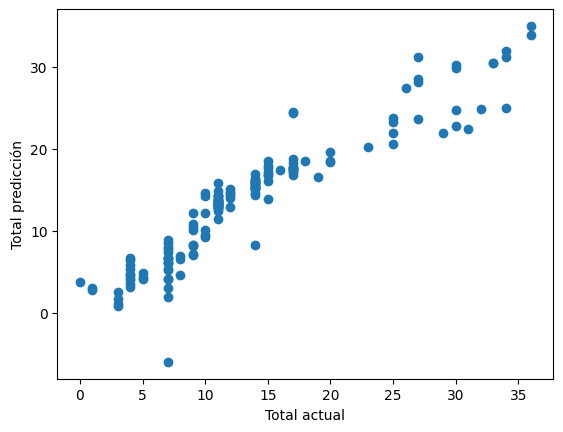

In [272]:
# Muestro la comparación en un grafico.

plt.scatter(y_test, y_pred)
plt.xlabel("Total actual")
plt.ylabel("Total predicción")
plt.show()

In [75]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 2.1675229396553903
Error Cuadratico Medio: 8.173629239095417
Raíz del error cuadrático medio: 2.8589559701218583


In [ ]:
# Los valores obtenidos terminan siendo muy similares a los anteriores de la regresión lineal multiple sin hacer la eliminación hacia atras.
# La conclusión de estos datos es que los atributos que se eliminaron durante el proceso de regresión hacia atrás no aportaban una mejora significativa en la capacidad predictiva del modelo.
# Ya que, cuando se realiza una regresión hacia atrás OLS, el objetivo es eliminar gradualmente los atributos menos relevantes del modelo hasta llegar a una configuración óptima.
# Si los atributos que se eliminaron durante la regresión hacia atrás tenían un impacto insignificante en la predicción de la variable dependiente, es probable que su exclusión no haya afectado significativamente la capacidad del modelo para explicar la variabilidad de los datos. Como resultado, el error absoluto medio y la raíz del error cuadrático medio obtenidos después de la regresión hacia atrás OLS serán similares a los obtenidos mediante una regresión lineal múltiple.

In [ ]:
# Finalmente me gustaria realizar algunos Análisis Exploratorio de Datos (EDA) 

In [76]:
# Realizo la importación de los datos.

df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [275]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [276]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Winbattle     False
Resistance    False
dtype: bool

In [77]:
# únicamente tuve valores null en la columna Type 2, por lo que decido eliminarla para simplificar de manera resolutiva.

df.drop(["Type 2"], axis = 1, inplace = True)
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,40,500


In [278]:
# Constato que ahora no se encuentran valores null en el dataset.

df.isnull().values.any()

False

In [78]:
# Analizaré los datos que tienen que ver con los tipos de Pokémon.
# Calculo el promedio de cada Tipo de Pokémon según su valor Total. 
# Son 18 tipos.

print("Promedio por tipo:")
promedio_por_tipo = df.groupby("Type 1")["Total"].mean()
print(promedio_por_tipo)

Promedio por tipo:
Type 1
Bug         378.927536
Dark        445.741935
Dragon      550.531250
Electric    443.409091
Fairy       413.176471
Fighting    416.444444
Fire        458.076923
Flying      485.000000
Ghost       439.562500
Grass       421.142857
Ground      437.500000
Ice         433.458333
Normal      401.683673
Poison      399.142857
Psychic     475.947368
Rock        453.750000
Steel       487.703704
Water       430.455357
Name: Total, dtype: float64


In [79]:
# Calculo el porcentaje representativo de cada Tipo de Pokémon.

total = promedio_por_tipo.sum()
porcentaje_por_tipo = (promedio_por_tipo / total) * 100
print("\nPorcentaje por tipo:\n", porcentaje_por_tipo)


Porcentaje por tipo:
 Type 1
Bug         4.753437
Dark        5.591586
Dragon      6.906110
Electric    5.562322
Fairy       5.183071
Fighting    5.224066
Fire        5.746322
Flying      6.084057
Ghost       5.514069
Grass       5.283005
Ground      5.488196
Ice         5.437495
Normal      5.038900
Poison      5.007027
Psychic     5.970497
Rock        5.692043
Steel       6.117974
Water       5.399825
Name: Total, dtype: float64


In [80]:
# Determino cual es el Tipo con mayor porcentaje de todos.

tipo_mayor = porcentaje_por_tipo.idxmax()
print("\nTipo con mayor porcentaje:", tipo_mayor)


Tipo con mayor porcentaje: Dragon


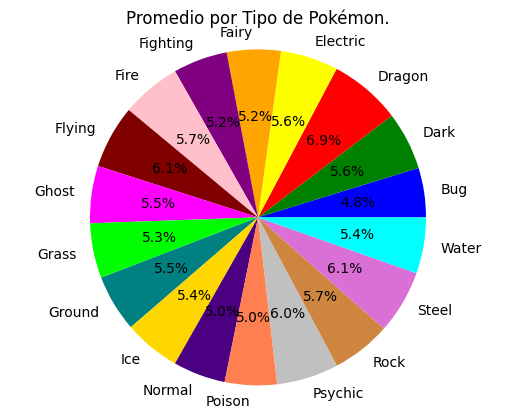

In [81]:
# Vuelco los valores en un gráfico representativo.

colores = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink', 'maroon', 'magenta', 'lime', 'teal', 'gold', 'indigo', 'coral', 'silver', 'peru', 'orchid', 'cyan']
plt.pie(promedio_por_tipo, labels=promedio_por_tipo.index, colors=colores, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Promedio por Tipo de Pokémon.')
plt.show()

In [87]:
# Para los datos de los Pokémon Legendarios.
# Cuento la cantidad de ocurrencias de cada valor en la columna "Legendary"
# Obtengo el porcentaje de Pokémon que son legendarios.

legendary_counts = df['Legendary'].value_counts()
percentage_legendary = (legendary_counts[True] / len(df)) * 100

print(f"Porcentaje de pokémon legendarios: {percentage_legendary:.1f}%")

Porcentaje de pokémon legendarios: 8.1%


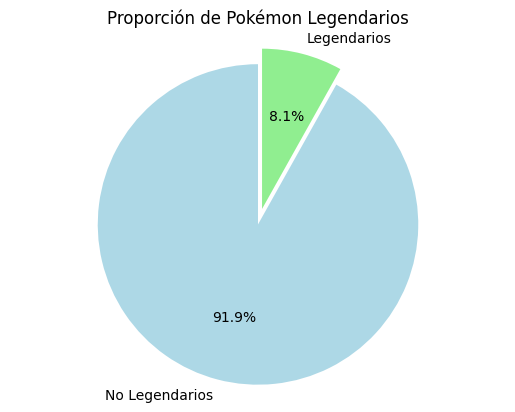

In [88]:
# Cuento la cantidad de ocurrencias de cada valor en la columna "Legendary"
# Defino los datos para el gráfico circular

legendary_counts = df['Legendary'].value_counts()
fig, ax = plt.subplots()
labels = ['No Legendarios', 'Legendarios']
sizes = [legendary_counts[False], legendary_counts[True]]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1) 

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proporción de Pokémon Legendarios')
plt.show()

In [89]:
# Realizo otro Análisis Exploratorio de Datos (EDA)
# En esta parte, decido tomar como parte de los datos el ataque, la defensa, la salud (HP) y la velocidad.

df[['Attack','Defense','HP','Speed']]

,Attack,Defense,HP,Speed
0,49,49,45,45
1,62,63,60,60
2,82,83,80,80
3,100,123,80,80
4,52,43,39,65
...,...,...,...,...
795,100,150,50,50
796,160,110,50,110
797,110,60,80,70
798,160,60,80,80


In [304]:
df[['Attack','Defense','HP','Speed']].describe()

,Attack,Defense,HP,Speed
count,800.000000,800.000000,800.000000,800.000000
mean,79.001250,73.842500,69.258750,68.277500
std,32.457366,31.183501,25.534669,29.060474
min,5.000000,5.000000,1.000000,5.000000
25%,55.000000,50.000000,50.000000,45.000000
50%,75.000000,70.000000,65.000000,65.000000
75%,100.000000,90.000000,80.000000,90.000000
max,190.000000,230.000000,255.000000,180.000000


In [305]:
df[['Attack','Defense','HP','Speed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Attack   800 non-null    int64
 1   Defense  800 non-null    int64
 2   HP       800 non-null    int64
 3   Speed    800 non-null    int64
dtypes: int64(4)
memory usage: 25.1 KB


Text(0.5, 0.98, 'Distribución de variables numéricas')

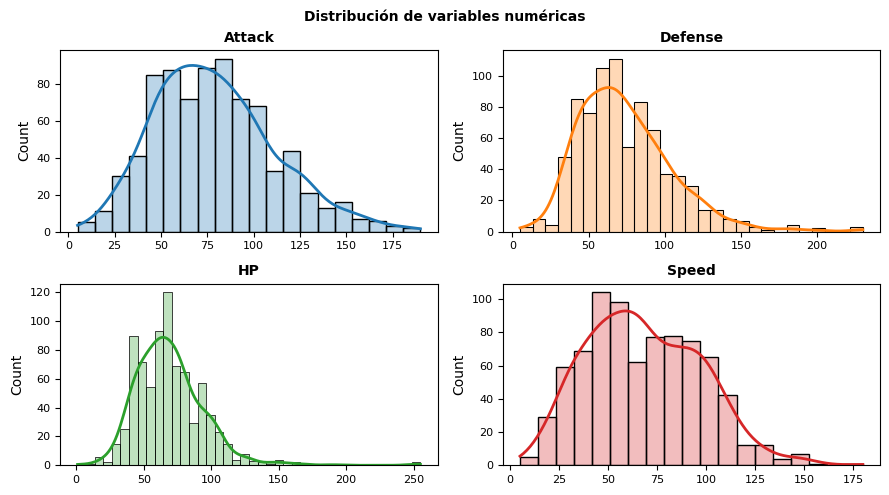

In [90]:
# Realizo un gráfico de distribución para cada variable numérica.
# De esta manera puedo percibir la cantidad de registros que tienen determinado valor en las variables.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df[['Attack','Defense','HP','Speed']].select_dtypes(include=['float64', 'int']).columns
for i, colum in enumerate(columnas_numeric):
 sns.histplot(
 data = df[['Attack','Defense','HP','Speed']],
 x = colum,
 stat = "count",
 kde = True,
 color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
 line_kws= {'linewidth': 2},
 alpha = 0.3,
 ax = axes[i]
 )
 axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
 axes[i].tick_params(labelsize = 8)
 axes[i].set_xlabel("")
 
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables numéricas', fontsize = 10, fontweight = "bold")

<Axes: ylabel='Density'>

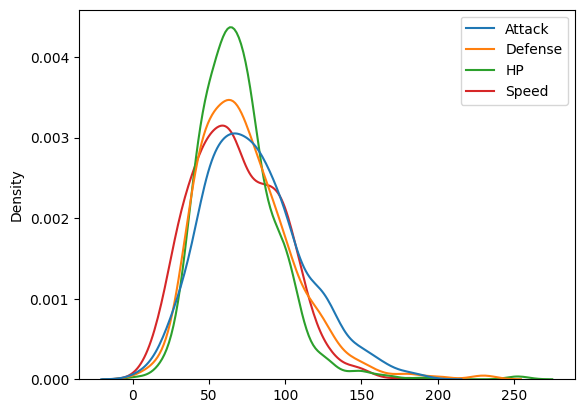

In [91]:
# Gráfico de densidad en donde coloco los 4 atributos juntos.

sns.kdeplot(data=df[['Attack','Defense','HP','Speed']].select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"]))

In [92]:
# Ahora trabajaré con otro sector de los datos.
# Decido crear un concepto nuevo denominado Calificación partiendo de los valores de Total y etiquetándolos según un criterio.

df['Calificacion'] = pd.cut(df.Total, bins=[0,450 ,650, float('inf')], labels=['Debil','Moderado','Fuerte'])

In [93]:
# Noto que ya se reconoce a Calificación como una columna más.

df[['Generation','#','Calificacion','Total']].shape

(800, 4)

In [94]:
# Imprimo los datos obtenidos.

df[['Generation','#','Calificacion','Total']]

,Generation,#,Calificacion,Total
0,1,1,Debil,318
1,1,2,Debil,405
2,1,3,Moderado,525
3,1,3,Moderado,625
4,1,4,Debil,309
...,...,...,...,...
795,6,719,Moderado,600
796,6,719,Fuerte,700
797,6,720,Moderado,600
798,6,720,Fuerte,680


In [95]:
# Obtengo la cantidad de registros por Calificación

df.Calificacion.value_counts()


Calificacion
Debil       404
Moderado    363
Fuerte       33
Name: count, dtype: int64

In [96]:
# Outliers normalizados. 

df.Calificacion.value_counts(normalize=True)

Calificacion
Debil       0.50500
Moderado    0.45375
Fuerte      0.04125
Name: proportion, dtype: float64

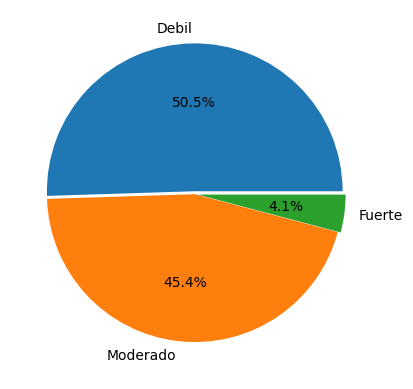

In [97]:
# Graficamos y notamos que una pequeña parte de los datos es apenas calificada como Fuerte, predominando el Débil, y de cerca los Moderados.

df.Calificacion.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', ylabel = '', explode = (0.02, 0, 0.02))
plt.show()

In [98]:
# Obtengo el total de la suma de sus Total.

df.groupby(['Calificacion'])['Total'].sum()

Calificacion
Debil       135869
Moderado    189133
Fuerte       23080
Name: Total, dtype: int64

In [99]:
# Determino la media 

df.groupby(['Calificacion'])['Total'].mean()

Calificacion
Debil       336.309406
Moderado    521.027548
Fuerte      699.393939
Name: Total, dtype: float64

In [100]:
# Decido agrupar mis datos por Generación, además quiero obtener el número de ID de cada Pokémon por generación.
# También la suma de sus totales.
# Noto que hay más cantidad de Pokémon en la primera generación.
# También hay más cantidad de valor Total en la quinta generación.


grouped = df.groupby("Generation").agg({"#": "count", "Total": "sum"})
print(grouped)

              #  Total
Generation            
1           166  70851
2           106  44338
3           160  69796
4           121  55541
5           165  71773
6            82  35783


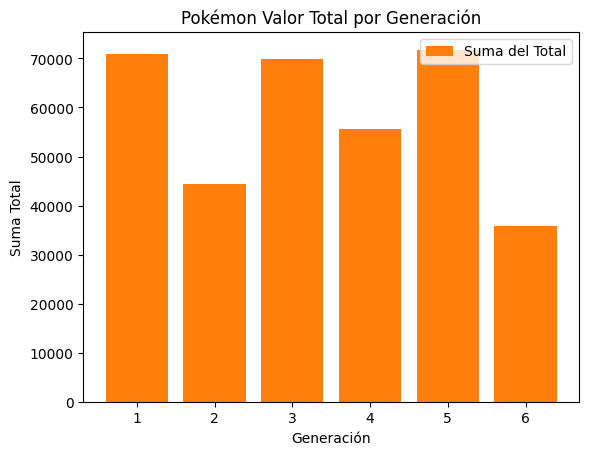

In [101]:
# Armo una gráfica con las generaciones y el Total.

fig, ax = plt.subplots()
generaciones = grouped.index
cantidad_pokemones = grouped["#"]
suma_total = grouped["Total"]
ax.bar(generaciones, cantidad_pokemones)
ax.bar(generaciones, suma_total, label="Suma del Total")
ax.set_xlabel("Generación")
ax.set_ylabel("Suma Total")
ax.set_title("Pokémon Valor Total por Generación")
ax.legend()
plt.show()

In [ ]:
# Aplicaré un analisis mas para las caracteristicas de HP, Attack, Defense, Sp. Atk, Sp. Def y Speed como caracteristicas particulares
# Con el Total como columna objetivo aplicando una regresión de Random Forest.

In [102]:
# Importo las librerías que utilizaré

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [103]:
# Importo nuevamente el dataset

df = pd.read_csv('pokemonResistance.csv', low_memory=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Winbattle,Resistance
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,35,450
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,50,730
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,75,940
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,86,1110
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,40,500


In [104]:
# Selecciono las columnas de características y el objetivo

columnas_caracteristicas = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
columna_objetivo = 'Total'

In [105]:
# Divido los datos en conjuntos de entrenamiento y prueba

X = df[columnas_caracteristicas]
y = df[columna_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Creo el modelo de regresión con Random Forest

regresor_rf = RandomForestRegressor(random_state=42)

In [107]:
# Entreno el modelo

regresor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
# Realizo las predicciones en el conjunto de prueba

y_pred = regresor_rf.predict(X_test)

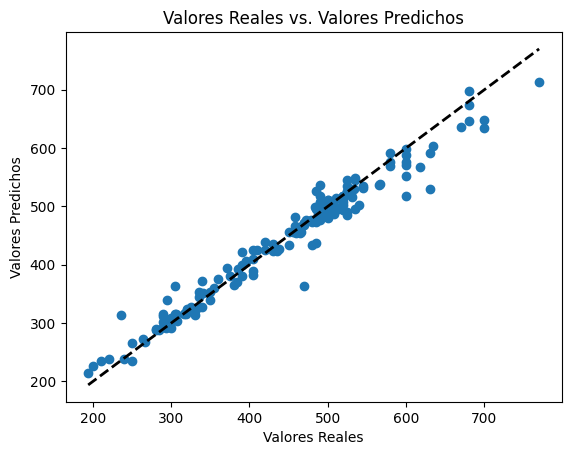

In [110]:
# Gráfico de predicción vs valores reales

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.show()

In [ ]:
# Finalmente analizaré el Error Absoluto Medio, el Error Cuadratico Medio y la Raíz del error cuadrático medio.

# El Error Absoluto Medio mide la magnitud promedio de los errores en las predicciones del modelo. Se calcula tomando la diferencia absoluta entre cada valor predicho y el valor real, y luego promediando esos errores.
# El Error Cuadrático Medio calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Al elevar los errores al cuadrado, este métrica da más peso a los errores más grandes.
# La Raíz del Error Cuadrático Medio es simplemente la raíz cuadrada del MSE. Proporciona una medida del error promedio, similar al MAE, pero está en la misma escala que los valores originales.

In [111]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [112]:
print("Error Absoluto Medio:", mae)
print("Error Cuadrático Medio:", mse)
print("Raíz del Error Cuadrático Medio:", rmse)

Error Absoluto Medio: 16.507625
Error Cuadrático Medio: 601.6114749999999
Raíz del Error Cuadrático Medio: 24.527769466463923


In [ ]:
# Algunas conclusiones que destaco son las siguientes.
# La Raíz del Error Cuadrático Medio dio 24.52 y es un valor consistente ya que está por debajo del valor 50 que representa el 10% del valor de la media de Total que es 500, recordando que total es la columna objetivo.
# Sin embargo, lo que complica al analisis es el valor arrojado en el Error Cuadrático Medio que es de 601.61. 
# Al tener un MSE alto, significa que los errores individuales de las predicciones del modelo están siendo penalizados de manera considerable al elevarse al cuadrado.
# Por lo que el modelo de regresión con Random Forest, para este caso, puede tener un rendimiento deficiente en términos de la precisión de la predicción de la variable objetivo.

# Algunas posibles conclusiones generales basadas en el análisis son:
# El modelo de regresión con Random Forest puede no estar capturando adecuadamente las relaciones y patrones en los datos del conjunto de entrenamiento. Esto puede deberse a una configuración incorrecta de los hiperparámetros o a una falta de características relevantes.
# Los datos utilizados para entrenar el modelo pueden contener ruido, valores atípicos o falta de representatividad en relación con la variable objetivo. Esto puede afectar la capacidad del modelo para realizar predicciones precisas.
# El modelo puede estar sobreajustando los datos de entrenamiento, lo que significa que está capturando demasiado los detalles y patrones específicos de los datos de entrenamiento, pero no generaliza bien a nuevos datos.